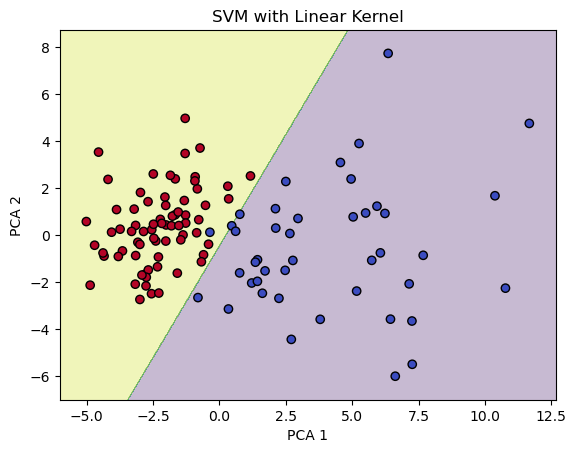

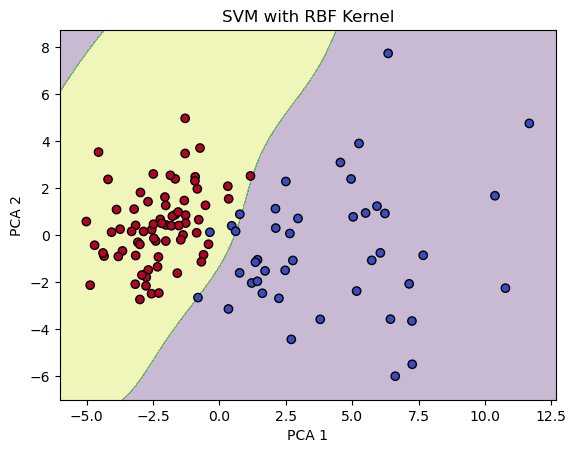

Best parameters from GridSearchCV: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Classification report on test data:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Cross-validation accuracy scores: [0.97368421 0.97368421 0.97368421 0.96491228 0.98230088]
Mean accuracy: 0.9736531594472908


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

plot_decision_boundary(svm_linear, X_test, y_test, 'SVM with Linear Kernel')

plot_decision_boundary(svm_rbf, X_test, y_test, 'SVM with RBF Kernel')

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best parameters from GridSearchCV:", grid.best_params_)
print("Classification report on test data:\n", classification_report(y_test, grid.predict(X_test)))

scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())
